In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path
from plot_style import *
from process_data import *

In [6]:
resnet_size_to_layers = {
    45: 18,  62: 26,  84: 34,  98: 50, 171: 101, 231: 152
}
resnet_to_size = {value: key for key, value in resnet_size_to_layers.items()}

In [7]:
data_dir = Path("data/polaris-tests-1node-localprovider")
filenames = list(data_dir.glob("*.log"))
filenames

[PosixPath('data/polaris-tests-1node-localprovider/test_log.parsl.1nodes.64tasks.32workers.log'),
 PosixPath('data/polaris-tests-1node-localprovider/test_log.redis.1nodes.64tasks.32workers.log')]

In [10]:
dfs = []
for fn in filenames:
    if "parsl" in fn.parts[-1]:
        backend = "parsl"
    elif "redis" in fn.parts[-1]:
        backend = "redis"
    else:
        raise ValueError
    df = process(load_txt(fn))
    df["backend"] = backend
    dfs.append(df)

df = pd.concat(dfs).reset_index(drop=True)
df.backend = df.backend.replace({
    "parsl": "Parsl",
    "redis": "Parsl+RedisConnector",
})
df["model_name"] = df.input_data.map(
    lambda mb: f"ResNet-{resnet_size_to_layers[mb]}"
)
df["model_name_mb"] = df.input_data.map(
    lambda mb: f"ResNet-{resnet_size_to_layers[mb]} ({mb} MB)"
)
df.head()

,num_workers,task_count,sleep_dur,input_data,output_data,event_kind,timing_sec,backend,model_name,model_name_mb
0,32,64,0,45,45,launched,14.109,Parsl,ResNet-18,ResNet-18 (45 MB)
1,32,64,0,45,45,finished,14.446,Parsl,ResNet-18,ResNet-18 (45 MB)
2,32,64,0,45,45,throughput,4.430,Parsl,ResNet-18,ResNet-18 (45 MB)
3,32,64,1,45,45,launched,14.021,Parsl,ResNet-18,ResNet-18 (45 MB)
4,32,64,1,45,45,finished,15.337,Parsl,ResNet-18,ResNet-18 (45 MB)


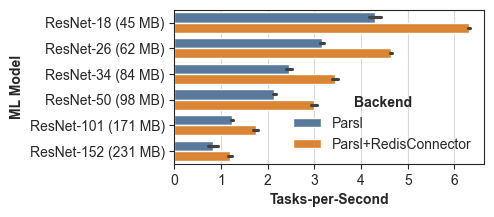

In [11]:
f, ax = plt.subplots(1, 1, figsize=(4, 2))
sns.barplot(
    df.query(f"event_kind == 'throughput'"), 
    x="timing_sec",
    y="model_name_mb", 
    hue="backend",
    ax=ax,
)
plt.xlabel("Tasks-per-Second", weight="bold")
plt.ylabel("ML Model", weight="bold")
# plt.xticks(rotation=90)
# plt.title(f"Throughput")
plt.legend(frameon=False, title="Backend")
plt.setp(ax.get_legend().get_title(), weight="bold")
plt.savefig("plots/tasks_per_sec_by_model.pdf", bbox_inches="tight")
plt.show()

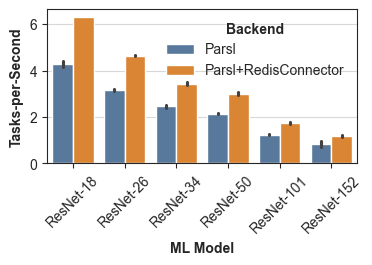

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(4, 2))
sns.barplot(
    df.query(f"event_kind == 'throughput'"), 
    y="timing_sec",
    x="model_name", 
    hue="backend",
    ax=ax,
)
plt.ylabel("Tasks-per-Second", weight="bold")
plt.xlabel("ML Model", weight="bold")
plt.xticks(rotation=45)
# plt.title(f"Throughput")
plt.legend(frameon=False, title="Backend")
plt.setp(ax.get_legend().get_title(), weight="bold")
# plt.savefig("plots/tasks_per_sec_by_model.pdf", bbox_inches="tight")
plt.show()

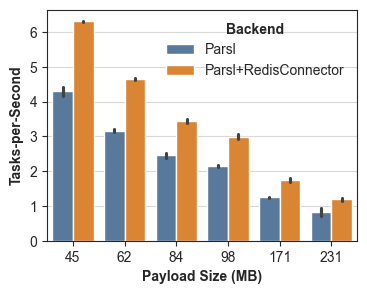

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.barplot(
    df.query(f"event_kind == 'throughput'"), 
    x="input_data", 
    y="timing_sec",
    hue="backend",
    ax=ax,
)
plt.ylabel("Tasks-per-Second", weight="bold")
plt.xlabel("Payload Size (MB)", weight="bold")
# plt.title(f"Throughput")
plt.legend(frameon=False, title="Backend")
plt.setp(ax.get_legend().get_title(), weight="bold")
plt.savefig("plots/tasks_per_sec_by_payload.pdf", bbox_inches="tight")
plt.show()

In [ ]:
df.input_data.unique()

array([ 45,  62,  84,  98, 171, 231])